# Scope of Exploratory Data Analysis (EDA)

# Table of Contents

1. [Section 1 : Understanding the data structures and cleansing the data](#section-1-understanding-the-data-structures-and-cleansing-the-data)
    - Data loading and examination
    - Data cleansing protocols

3. [Section 2: Exploring patterns and distributions of the data](#section-2-exploring-patterns-and-distributions-of-the-data)
    - Distribution of categorical data
    - Correlations between numerical data

4. [Section 3 Encoding Variables for ML Modelling](#section-3--encoding-variables-for-ml-modelling)
    - Binary variable encoding
    - Categorical variable encoding

Exploratory Data Analysis (EDA) will be coducted in this notebook to understand nature of the data and make decisions on how we go about user-segmentation and churn modelling.

- **Understanding Data Structure**: Summarizing the dataset to understand its shape, size, and types of variables.
- **Identifying Patterns**: Detecting trends, correlations, and relationships between variables.
- **Handling Missing Data**: Identifying and addressing missing or inconsistent values.
- **Detecting Outliers**: Spotting anomalies that may affect analysis or model performance.
- **Data Visualization**: Using plots and charts to represent data distributions and relationships visually.

## Section 1 : Understanding the data structures and cleansing the data

Here, data will be loaded from the .csv file and the column types and data structures contained will be examined. Additionally, inconsistencies in data will be identified and the appropriate data cleansing protocols will be used.


In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
# Pull relative filepath of .csv from the data folder
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
# Checking for duplicates
df.duplicated().sum()   

0

In [5]:
# Check the shape of the data
df.shape

(7043, 21)

In [6]:
# Check the data types of the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Check for non-numeric values in TotalCharges
df[~df['TotalCharges'].str.replace(' ', '').str.isnumeric()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Check for missing values again
df.isnull().sum()

# View null values
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
df = df.dropna(subset=['TotalCharges'])
df.shape

(7032, 21)

In [10]:
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
# Checking again for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Validating that the data types are now correct
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
# Check the unique values in the 'Churn' column
df['Churn'].unique()

# Converting senior citizen to a binary variable
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [13]:
df.to_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn_cleaned.csv", index=False)
# Checking the first few rows of the cleaned data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Section 2: Exploring patterns and distributions of the data

In this section, the following will be explored :

- Distribution of categorical data.
- Correlations between numerical data and any observed consequences.

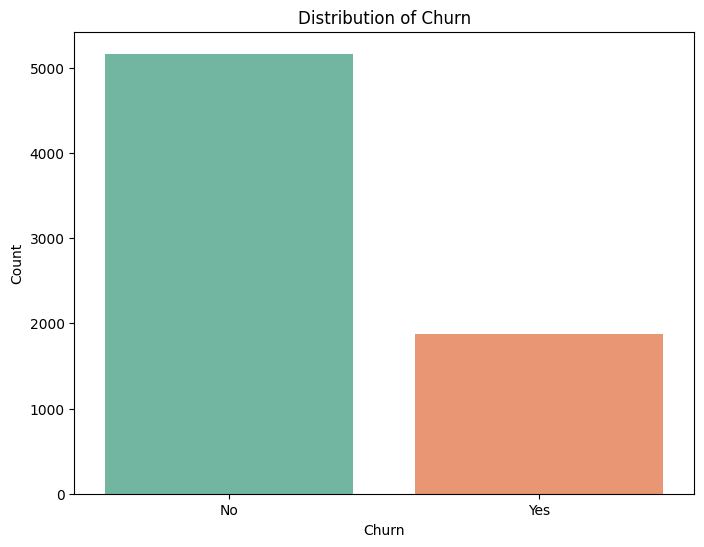

In [14]:
# Plot the distribution of the target variable (Churn)
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

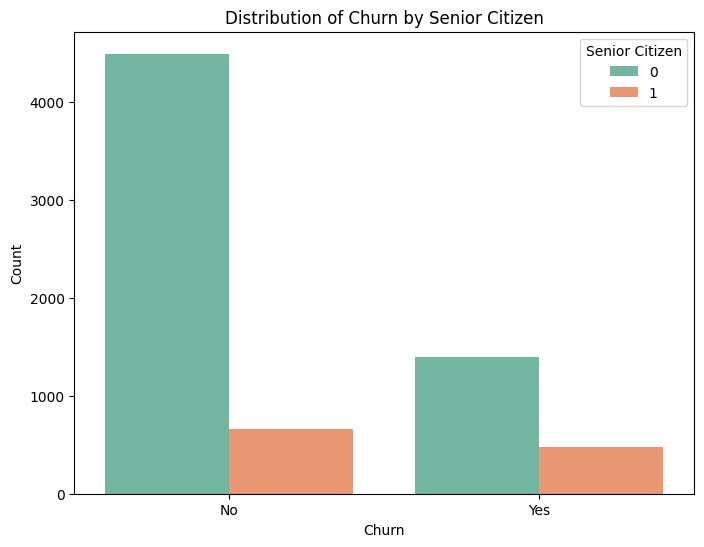

In [15]:
#Plotting the distribution of the target variable (Churn) by SeniorCitizen
plt.figure(figsize=(8, 6))  
sns.countplot(x='Churn', hue='SeniorCitizen', data=df, palette='Set2')
plt.title('Distribution of Churn by Senior Citizen')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Senior Citizen', loc='upper right')
plt.show()

As can be seen from the bar charts above we can infer the following so far.
1. A minority of customers are churning (Which is what we would hope)
2. More customers that are not senior citizens are churning that senior citizens

Text(0, 0.5, 'Count')

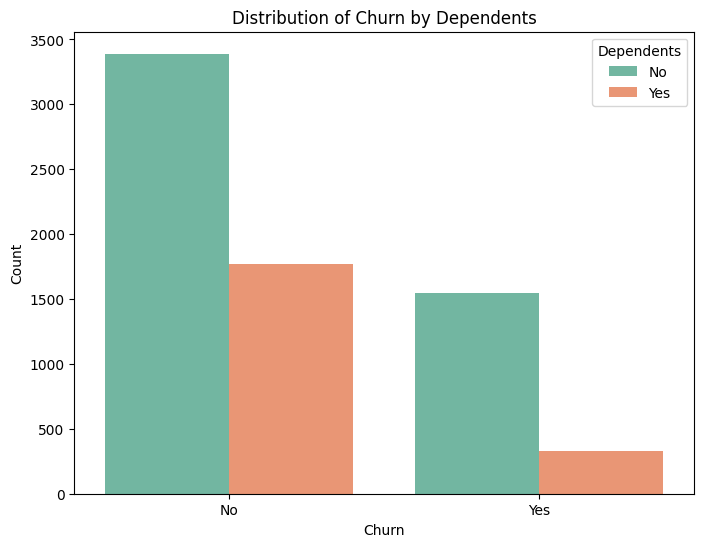

In [16]:
# Distribution of dependents of customers who churned
plt.figure(figsize=(8, 6)) 
sns.countplot(x='Churn', hue='Dependents', data=df, palette='Set2')
plt.title('Distribution of Churn by Dependents')
plt.xlabel('Churn')
plt.ylabel('Count') 

Text(0, 0.5, 'Count')

<Figure size 800x600 with 0 Axes>

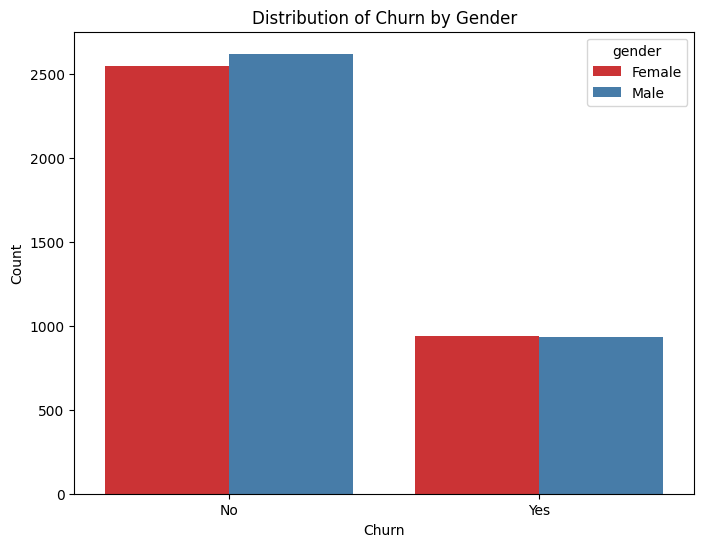

In [17]:
# Distribution of gender of customers who churned
plt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6)) 
sns.countplot(x='Churn', hue='gender', data=df, palette='Set1')
plt.title('Distribution of Churn by Gender')
plt.xlabel('Churn')
plt.ylabel('Count') 

From the distirbution of gender accross customers who Churned, there is no Gender bias meaning we do not need to consider a gender demographic when advertising personalised market campaigns.

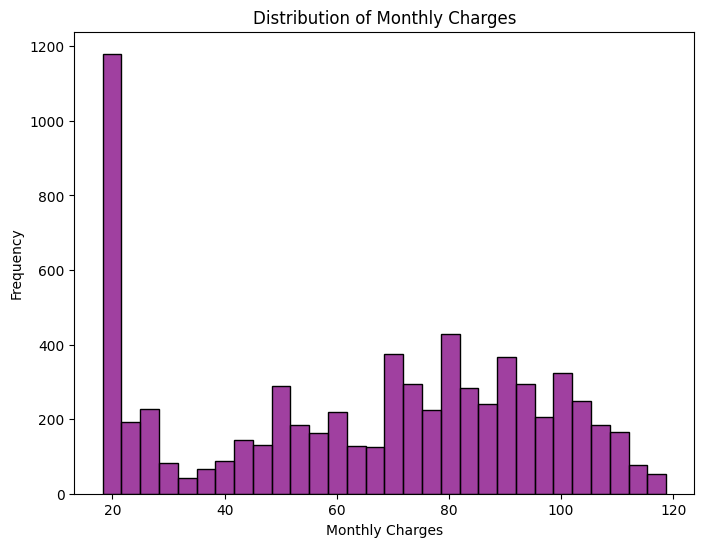

In [18]:
# Distribution of monthly charges
plt.figure(figsize=(8, 6))
sns.histplot(df['MonthlyCharges'], bins=30, color='purple')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

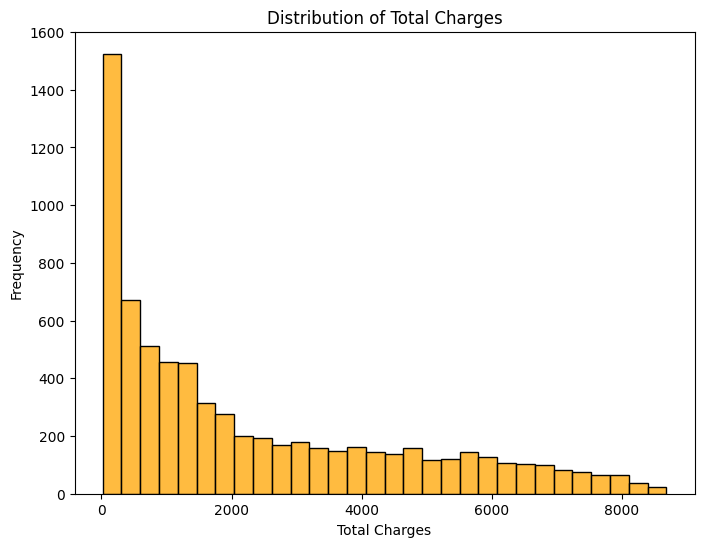

In [19]:
# Distribution of total charges
plt.figure(figsize=(8, 6))             
sns.histplot(df['TotalCharges'], bins=30, color='orange')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

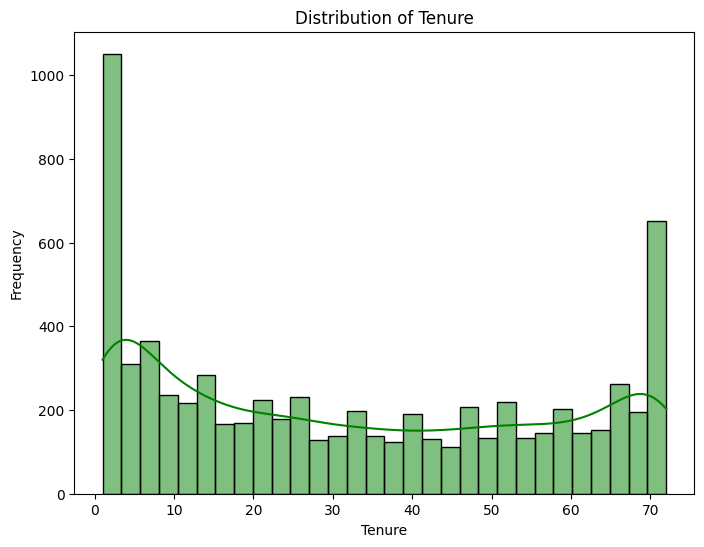

In [20]:
# Distribution of tenure
plt.figure(figsize=(8, 6))
sns.histplot(df['tenure'], bins=30, kde=True, color='green')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')   
plt.show()

The positive skew in the distribution of total charges indicates that most customers have lower total charges, which aligns with the observation that the majority of customers have shorter tenures. This suggests that customers with longer tenures are likely to accumulate higher total charges over time. However, further analysis could be conducted to confirm if there is a direct correlation between tenure and total charges.

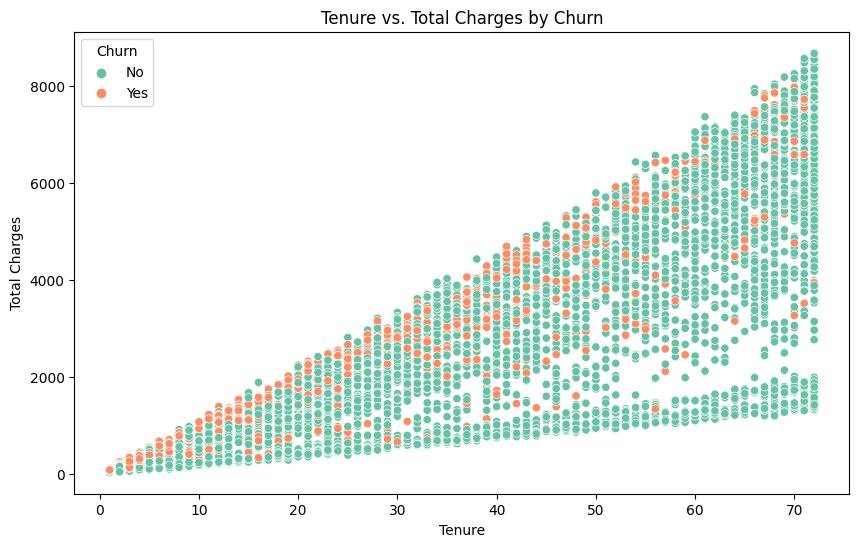

In [21]:
# Plot of tenure vs. Total Charges, with churn as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df, palette='Set2')
plt.title('Tenure vs. Total Charges by Churn')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')         
plt.legend(title='Churn')
plt.show()

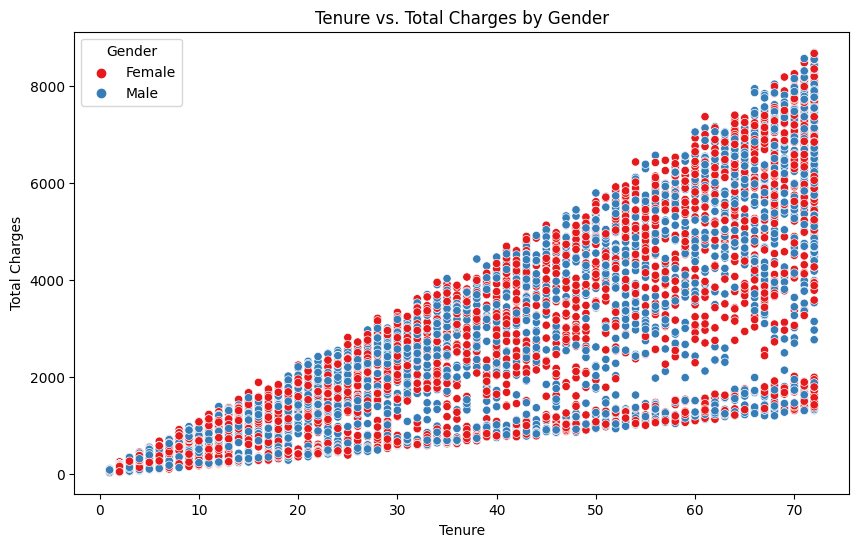

In [22]:
# Plot of tenure vs. Total Charges, with gender as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='TotalCharges', hue='gender', data=df, palette='Set1')
plt.title('Tenure vs. Total Charges by Gender')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')         
plt.legend(title='Gender')
plt.show()


From the scatter plots above, we observe a positive correlation between tenure and total charges. This supports the observation of the similarly shaped distributions of tenure and total charges. Therefore we can infer that customers who stay longer incur a larger total charge.

As observed with the hue, we see that those with higher total charges tend to churn over those with lower ones which coincides with one's intuition.

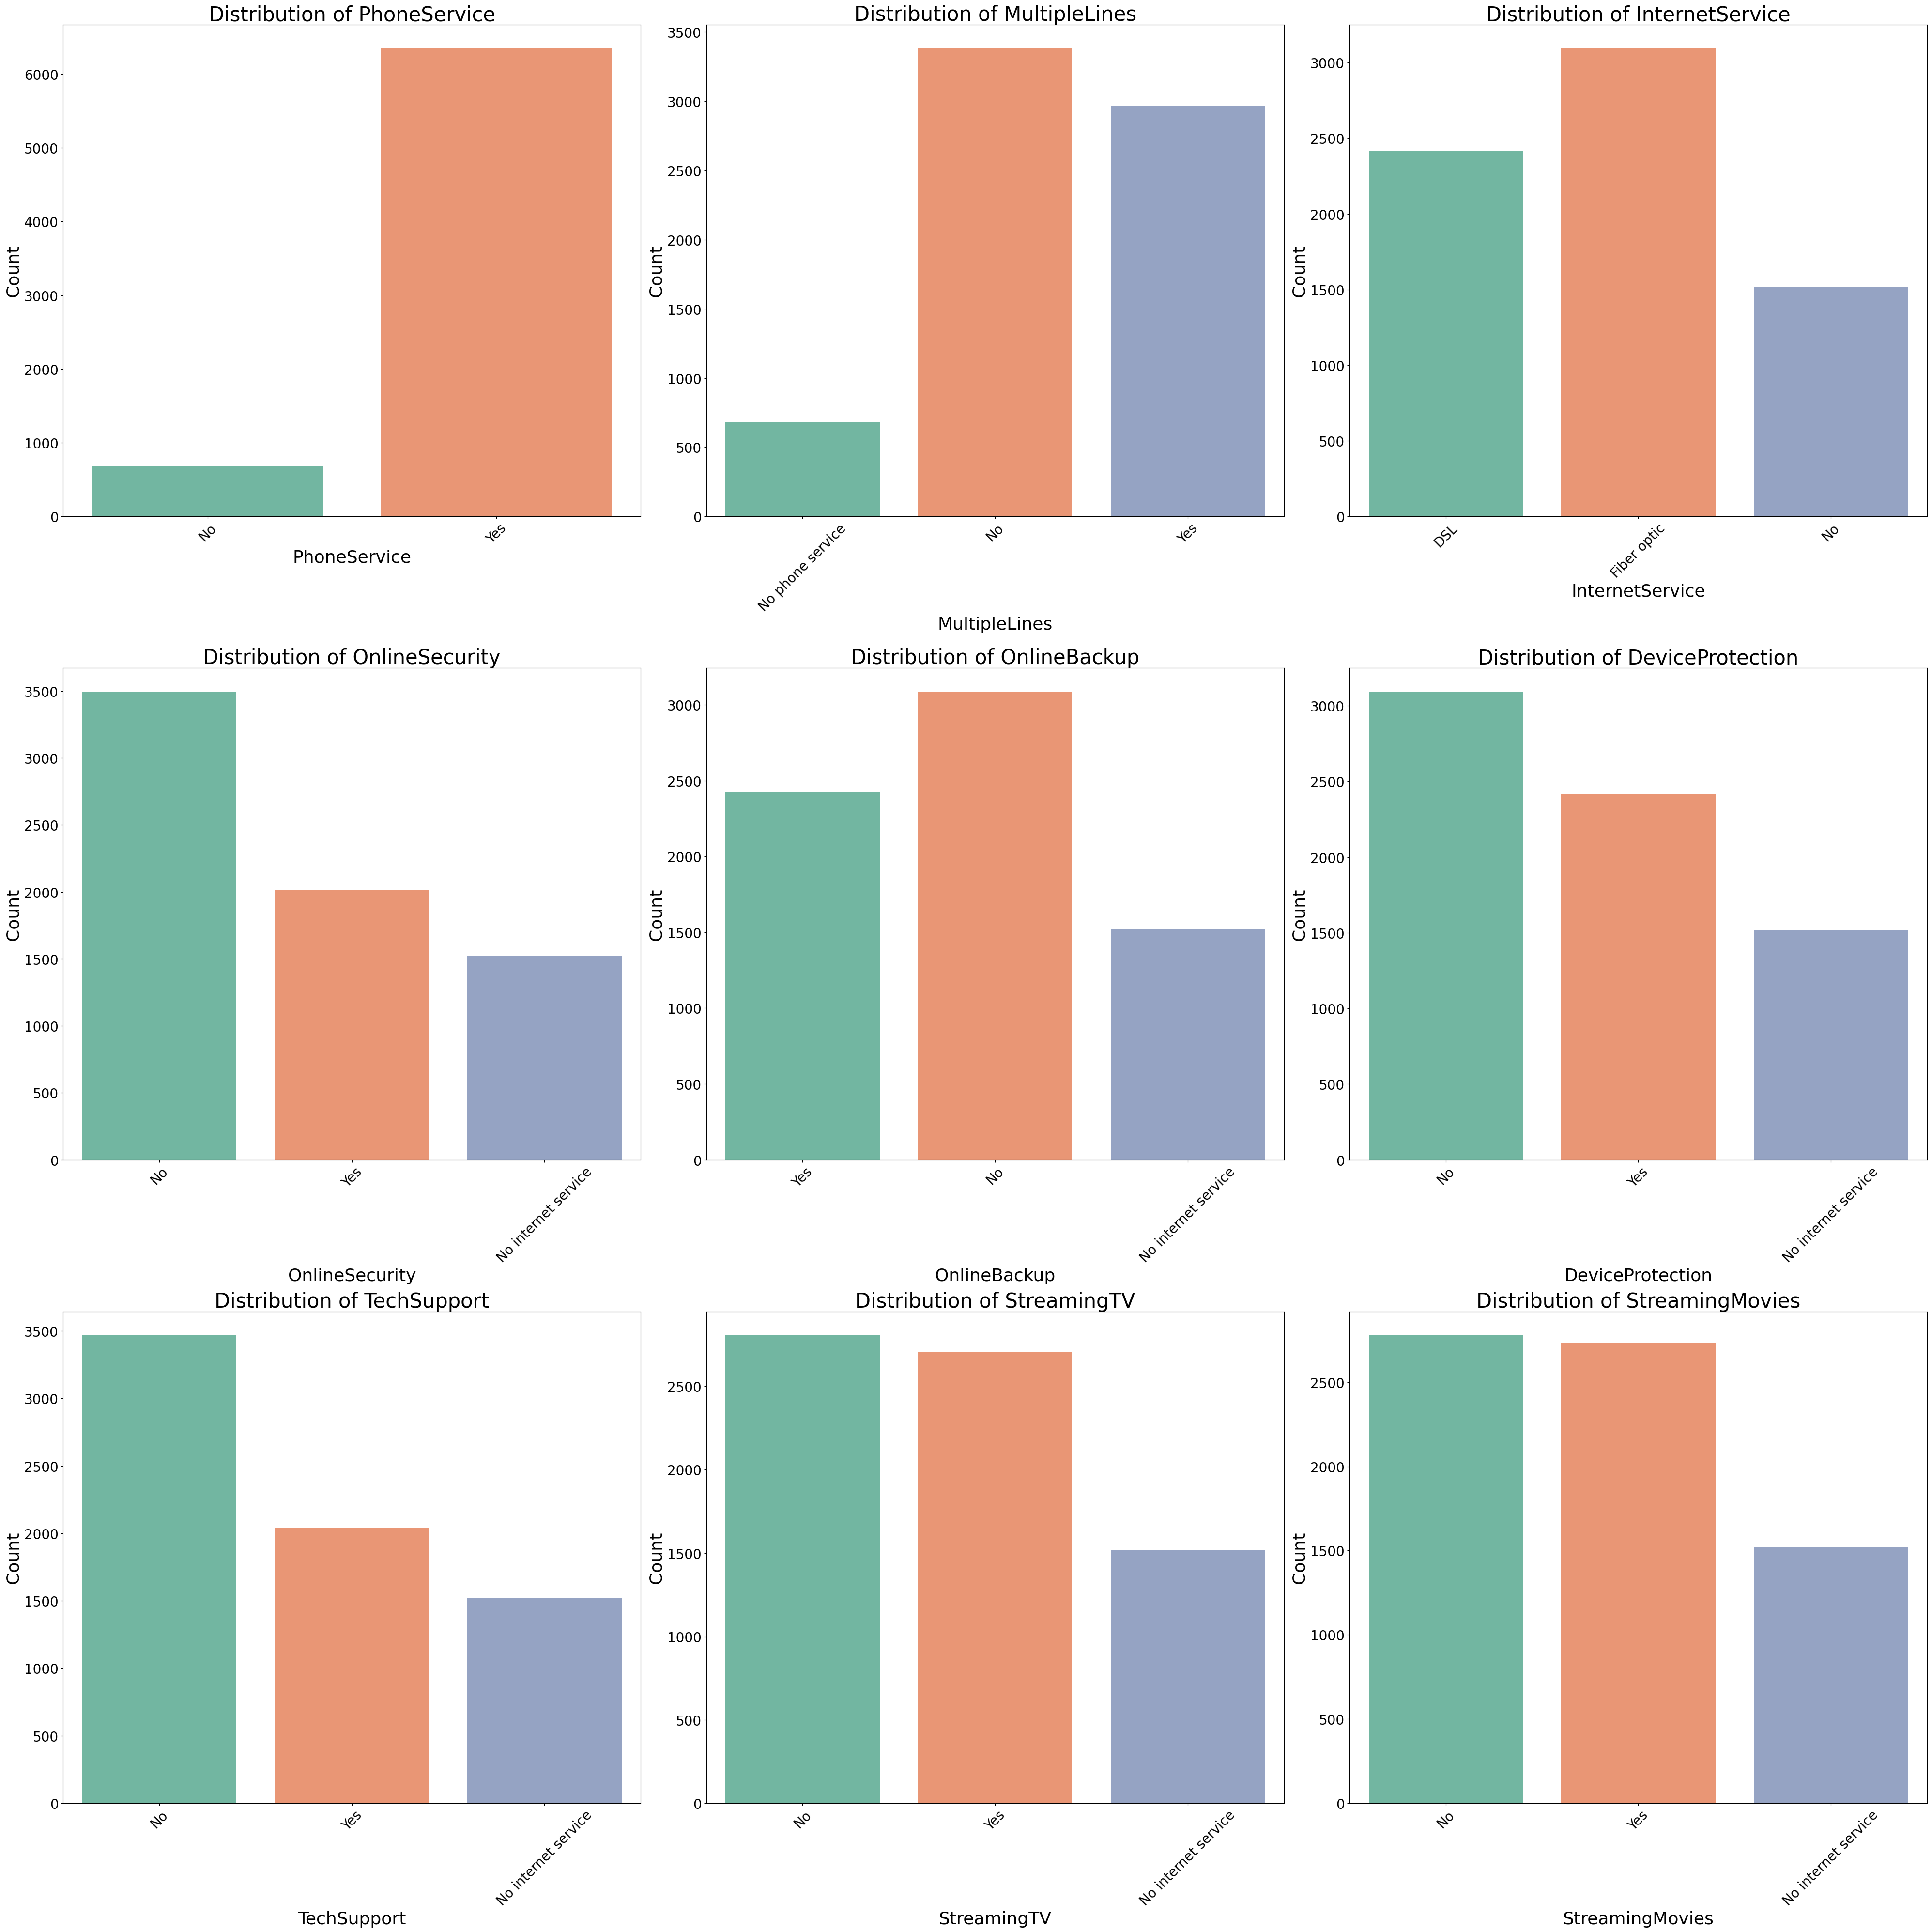

In [23]:
# List of categorical variables to plot
categorical_vars = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure
plt.figure(figsize=(40, 40))

# Loop through each variable and create a subplot
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)  # Create a grid of 3x3 subplots
    sns.countplot(x=var, data=df, palette='Set2')
    plt.title(f'Distribution of {var}', fontsize=30)
    plt.xlabel(var, fontsize=26)
    plt.ylabel('Count', fontsize=26)
    plt.xticks(rotation=45, fontsize=20)
    plt.yticks(fontsize=20)

# Adjust layout
plt.tight_layout()
plt.show()

From analysing the services taken out by customers we can infer the following :
- Most customers buy phone service from telco.
- Whilst a majority of people take out a phone service, we find that only slightly less people out of that group buy multiple lines.
- When it comes to internet service, fibre optic is by far the most popular which is due to unparalleled speeds it provides compared to DSL (direct service line).
- Most people do not buy online security, online back up and device protection for those who buy internet service
- The same is observed for tech support services, TV streaming and movie streaming although for streaming, there is not much difference between those who do and do not buy these services.

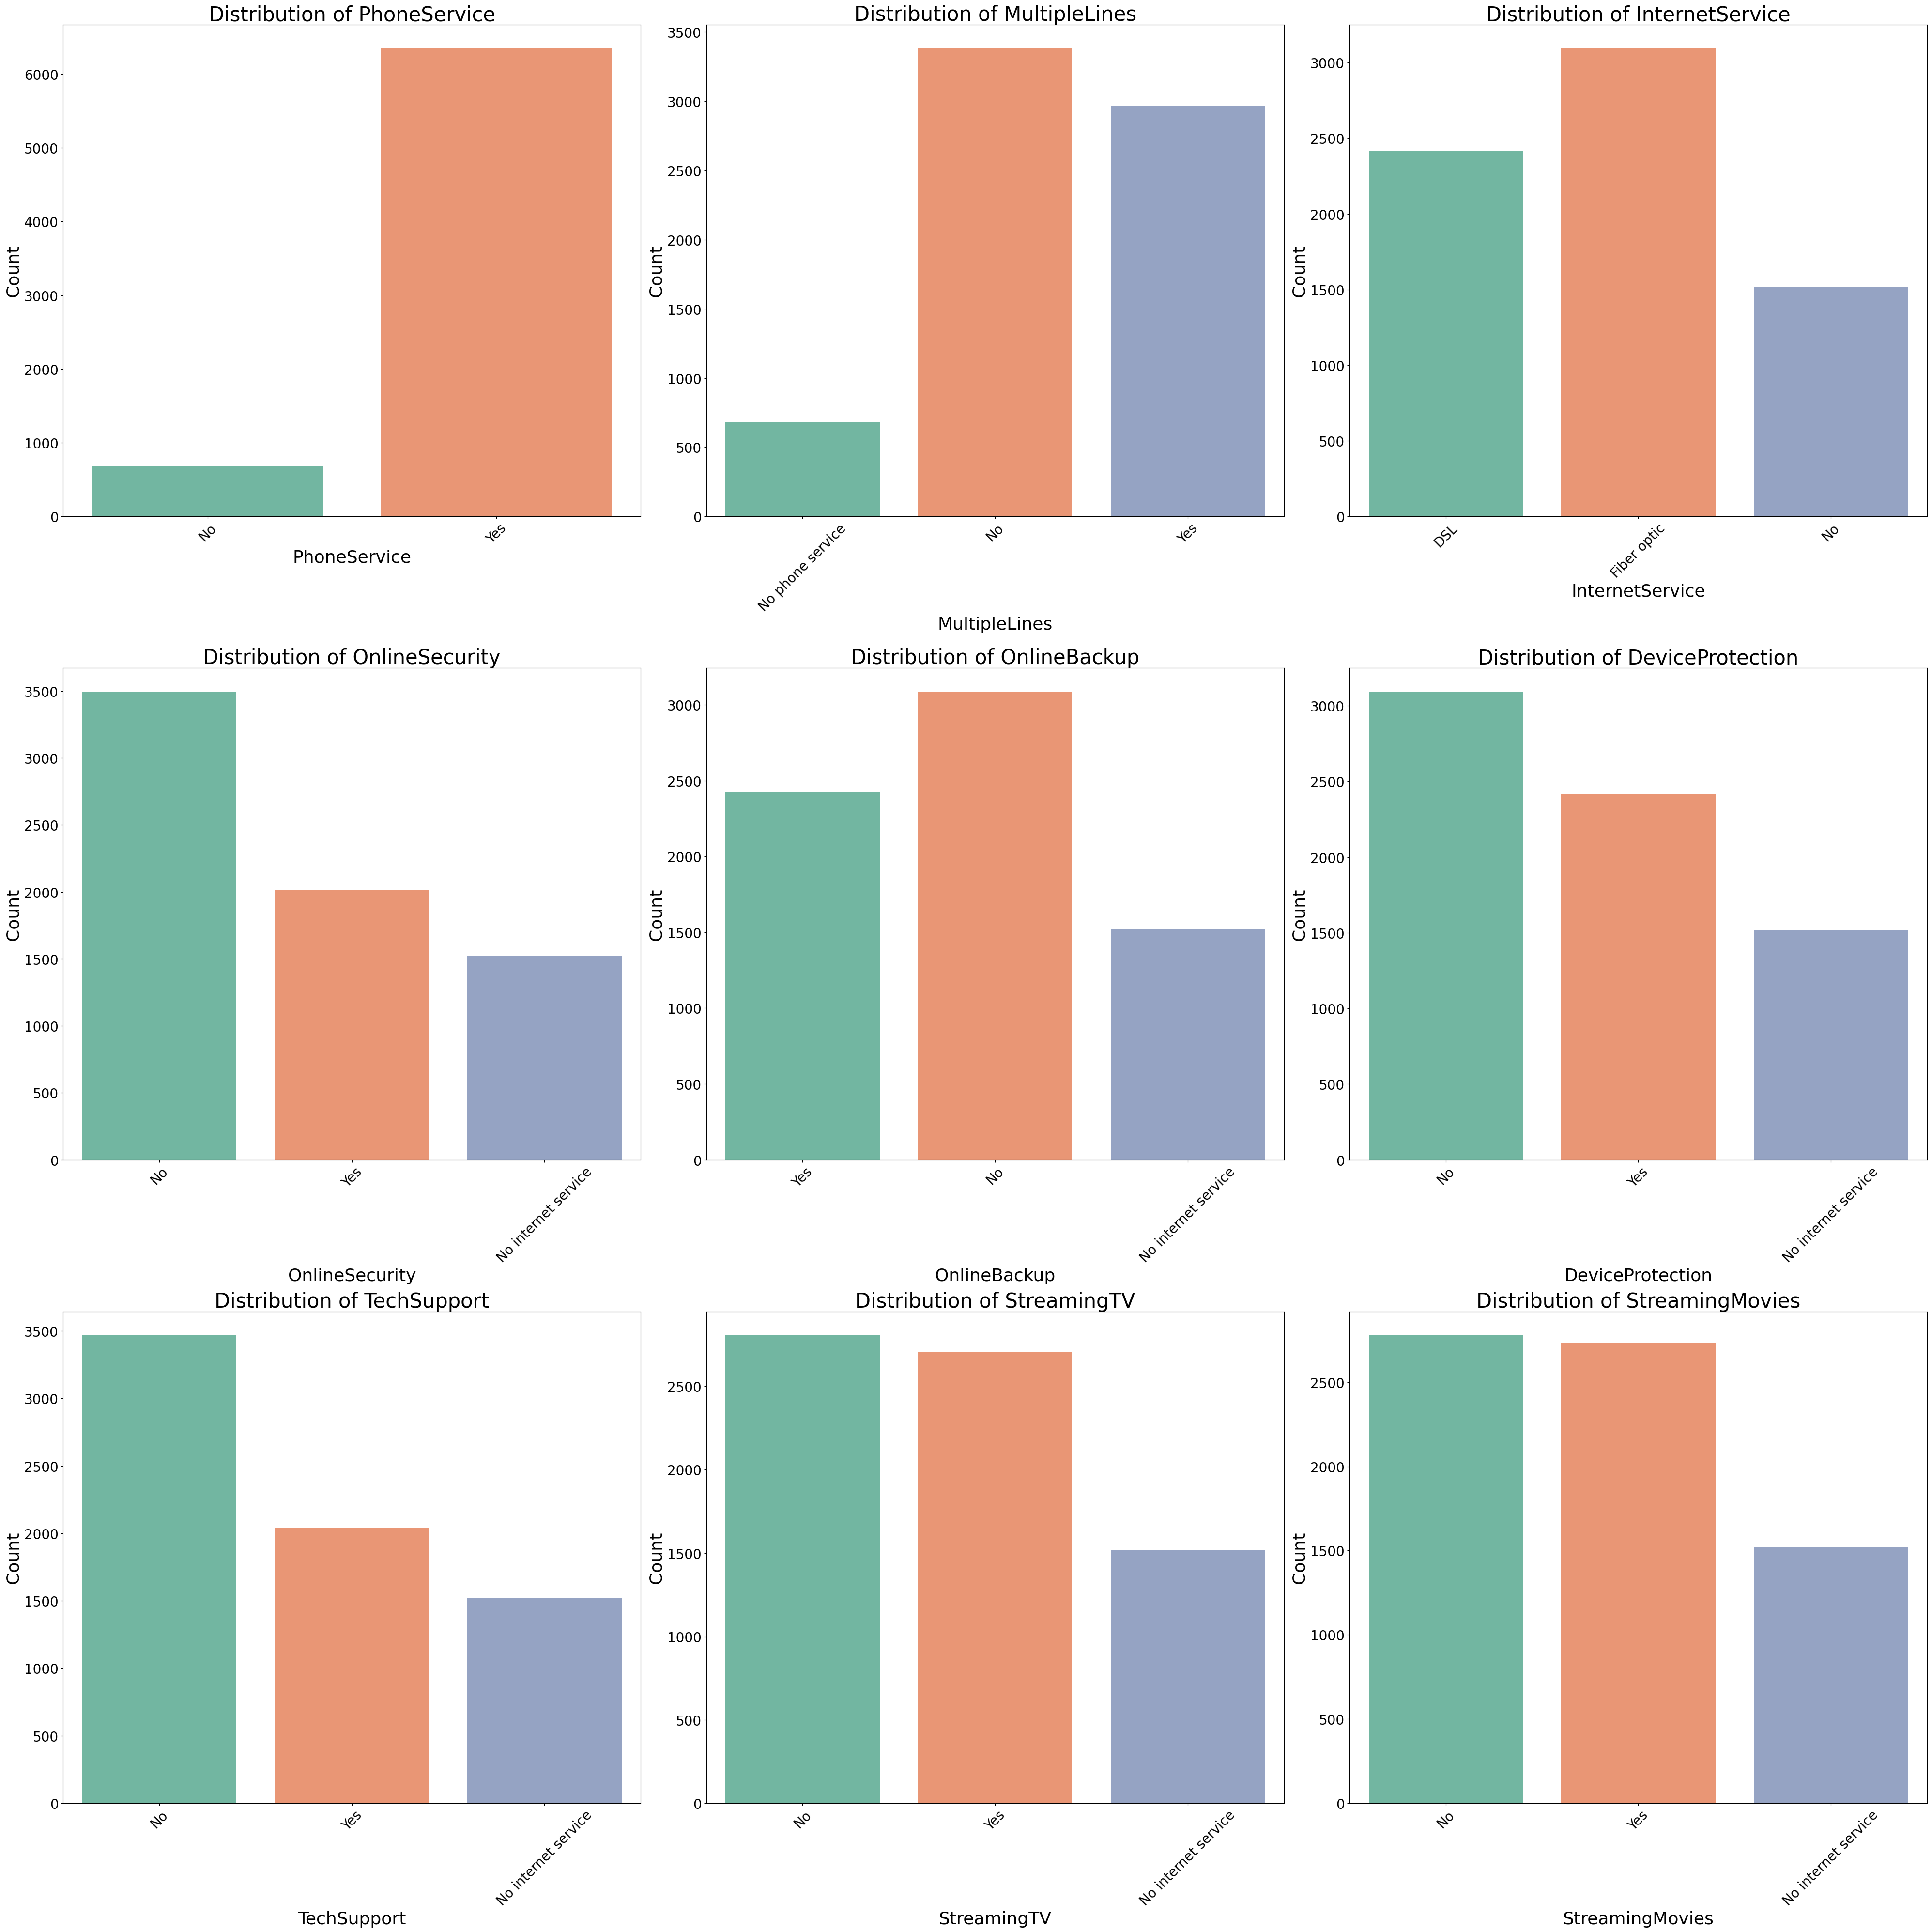

In [24]:
# List of categorical variables to plot
categorical_vars = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure
plt.figure(figsize=(40, 40))

# Loop through each variable and create a subplot
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)  # Create a grid of 3x3 subplots
    sns.countplot(x=var, data=df, palette='Set2')
    plt.title(f'Distribution of {var}', fontsize=30)
    plt.xlabel(var, fontsize=26)
    plt.ylabel('Count', fontsize=26)
    plt.xticks(rotation=45, fontsize=20)
    plt.yticks(fontsize=20)

# Adjust layout
plt.tight_layout()
plt.show()

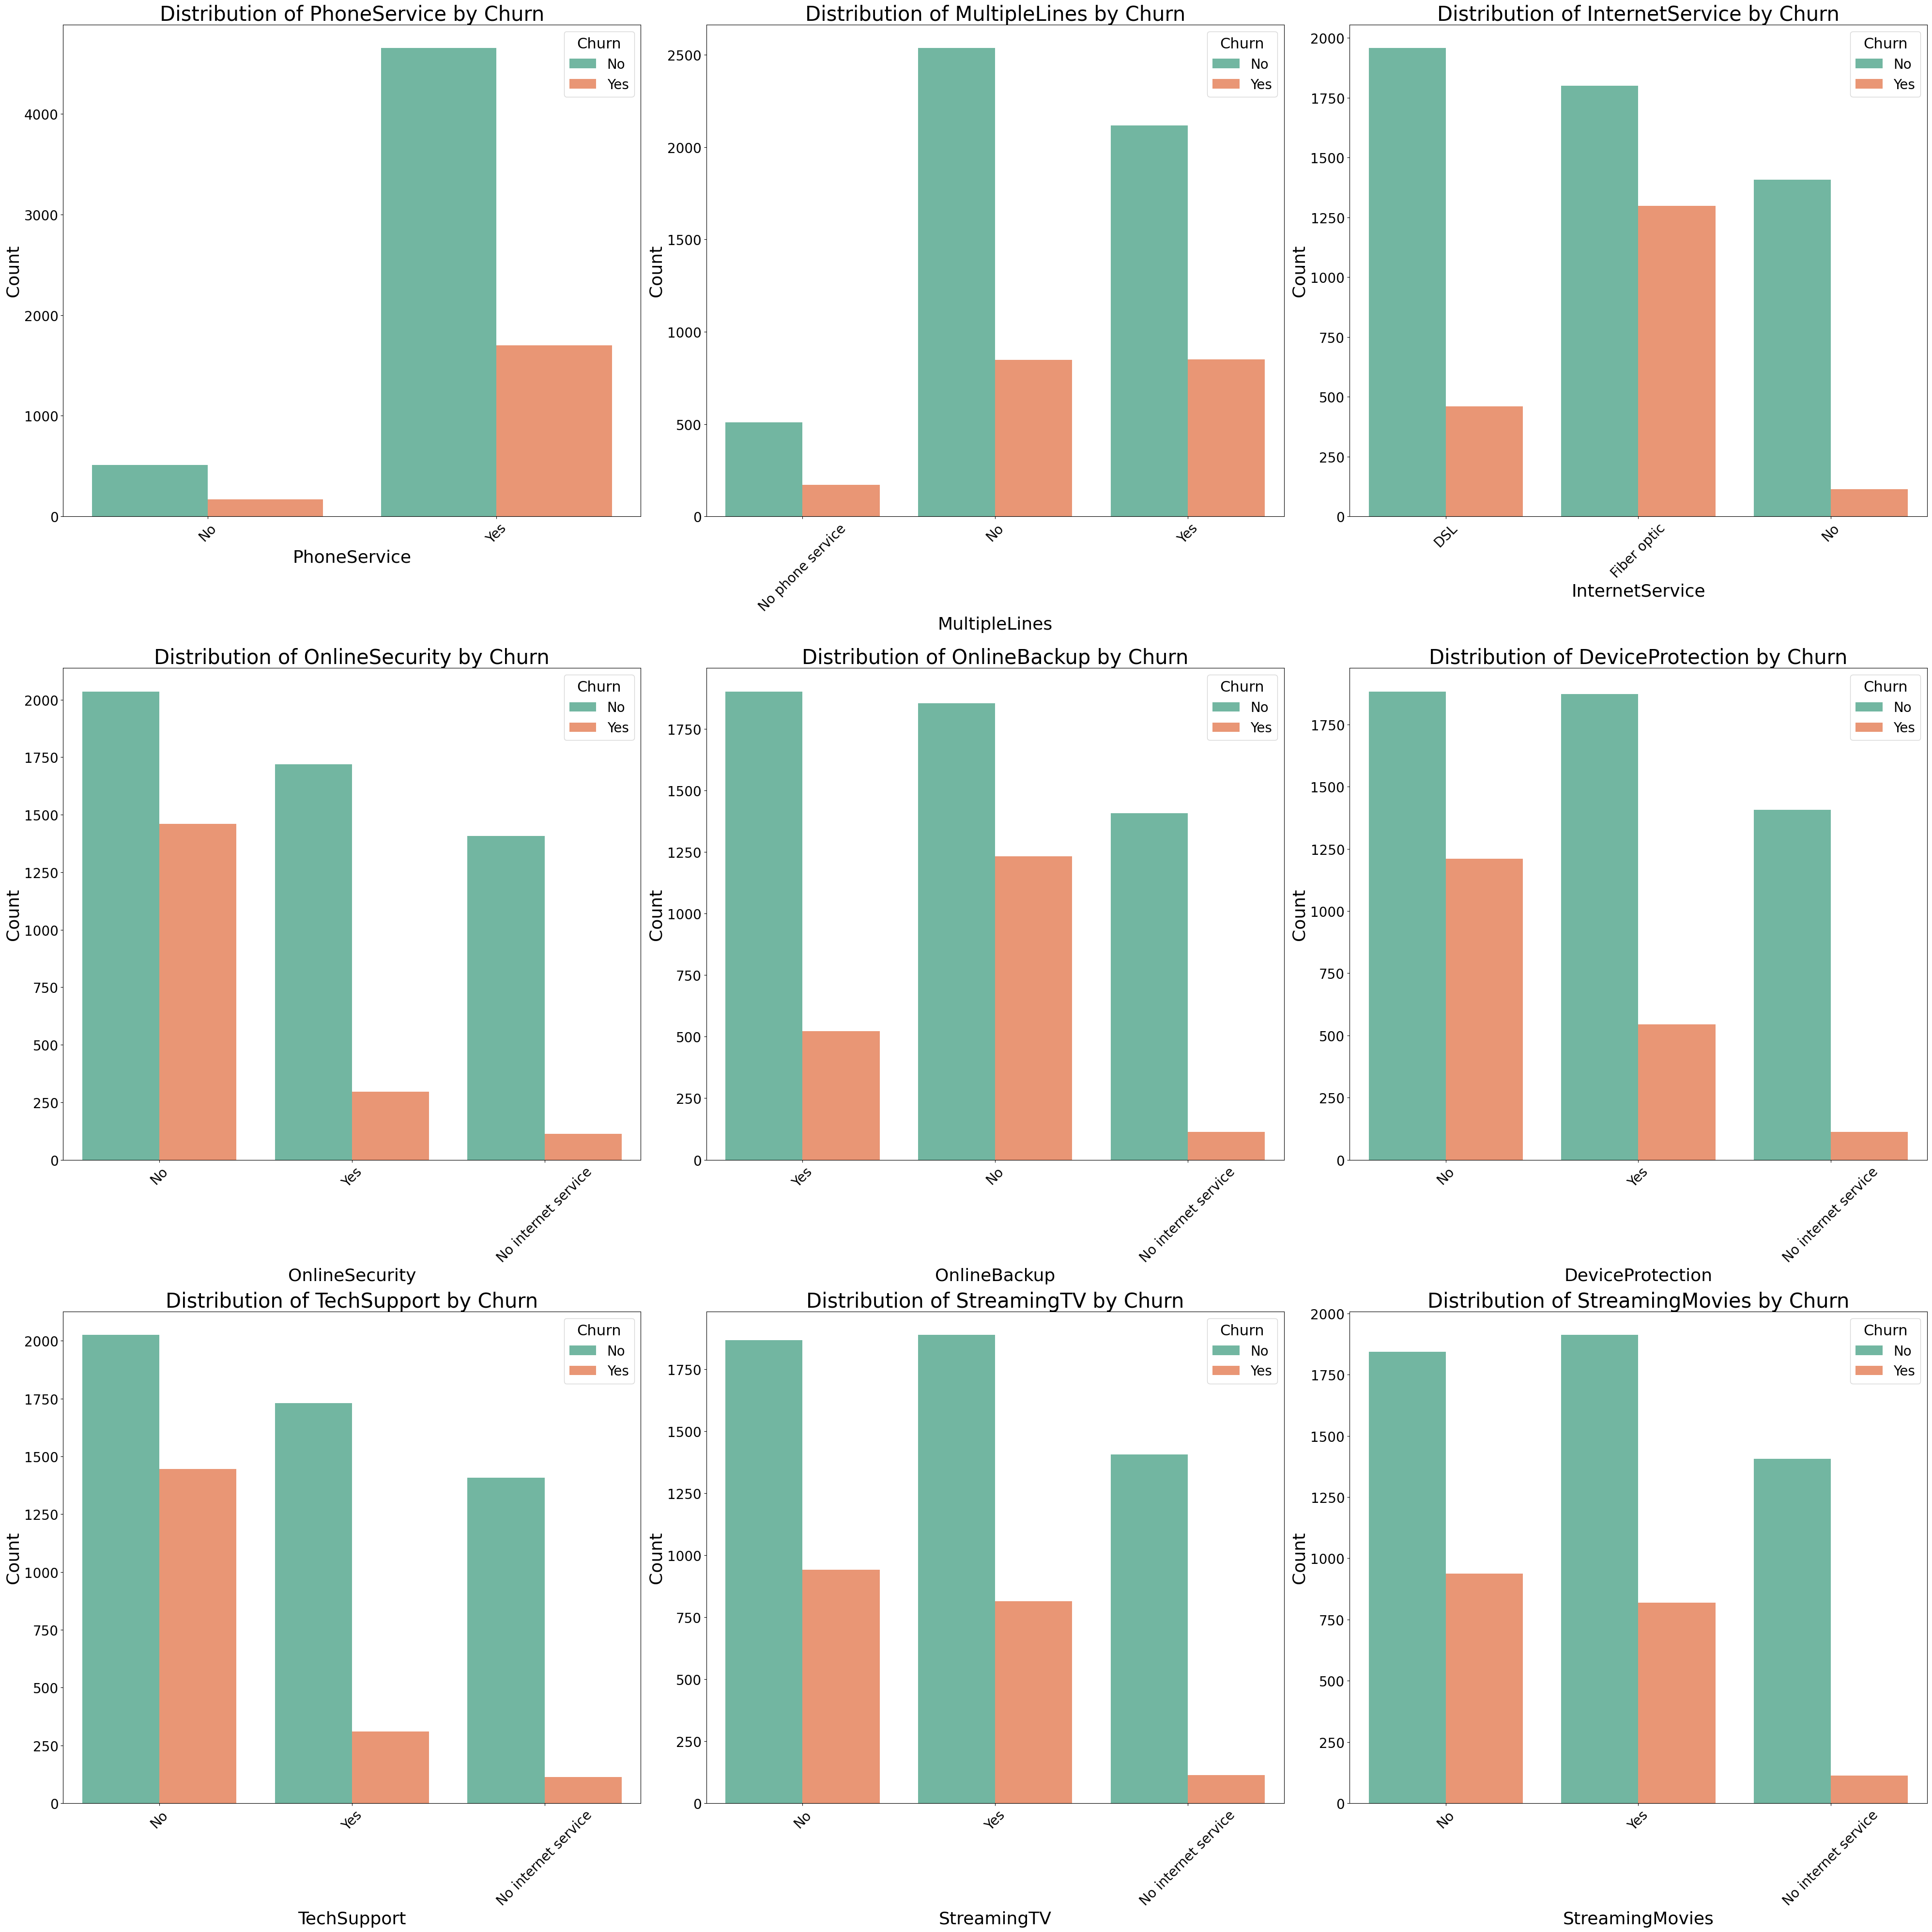

In [25]:
# List of categorical variables to plot
categorical_vars = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure
plt.figure(figsize=(40, 40))

# Loop through each variable and create a subplot
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)  # Create a grid of 3x3 subplots
    sns.countplot(x=var, hue='Churn', data=df, palette='Set2')
    plt.title(f'Distribution of {var} by Churn', fontsize=30)
    plt.xlabel(var, fontsize=26)
    plt.ylabel('Count', fontsize=26)
    plt.xticks(rotation=45, fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(title='Churn', fontsize=20, title_fontsize=22)

# Adjust layout
plt.tight_layout()
plt.show()

### Verification and Elaboration on Findings 
In this analysis, we look at the same distributions only this time, we look in the context of churn. Here are the two main observations :

#### Observation 1: Proportions of Churn for Multiple Lines
- **Finding**: The proportions of people who churn among those who take out multiple lines and those who don't are roughly the same.
- **Verification**: This can be verified by plotting the distribution of churn (`Churn`) with `MultipleLines` as the hue. The bar heights for churned and non-churned customers across the categories of `MultipleLines` appear similar, indicating no significant difference in churn behavior based on whether customers have multiple lines or not.
- **Elaboration**: This suggests that having multiple lines does not significantly influence a customer's decision to churn. Other factors, such as pricing or service quality, might play a more critical role.

#### Observation 2: Churn Rates for Internet Service Types
- **Finding**: Customers with DSL internet service have a significantly smaller number of people churning compared to those with fiber optics.
- **Verification**: This can be confirmed by plotting the distribution of churn (`Churn`) with `InternetService` as the hue. The bar heights for churned customers are noticeably higher for fiber optic users compared to DSL users.
- **Elaboration**: The higher churn rate for fiber optic users could be attributed to higher pricing plans or unmet expectations regarding service quality. DSL users, on the other hand, might have lower expectations or find the pricing more reasonable, leading to lower churn rates. This insight could guide targeted retention strategies, such as offering better pricing plans or improved service quality for fiber optic users.



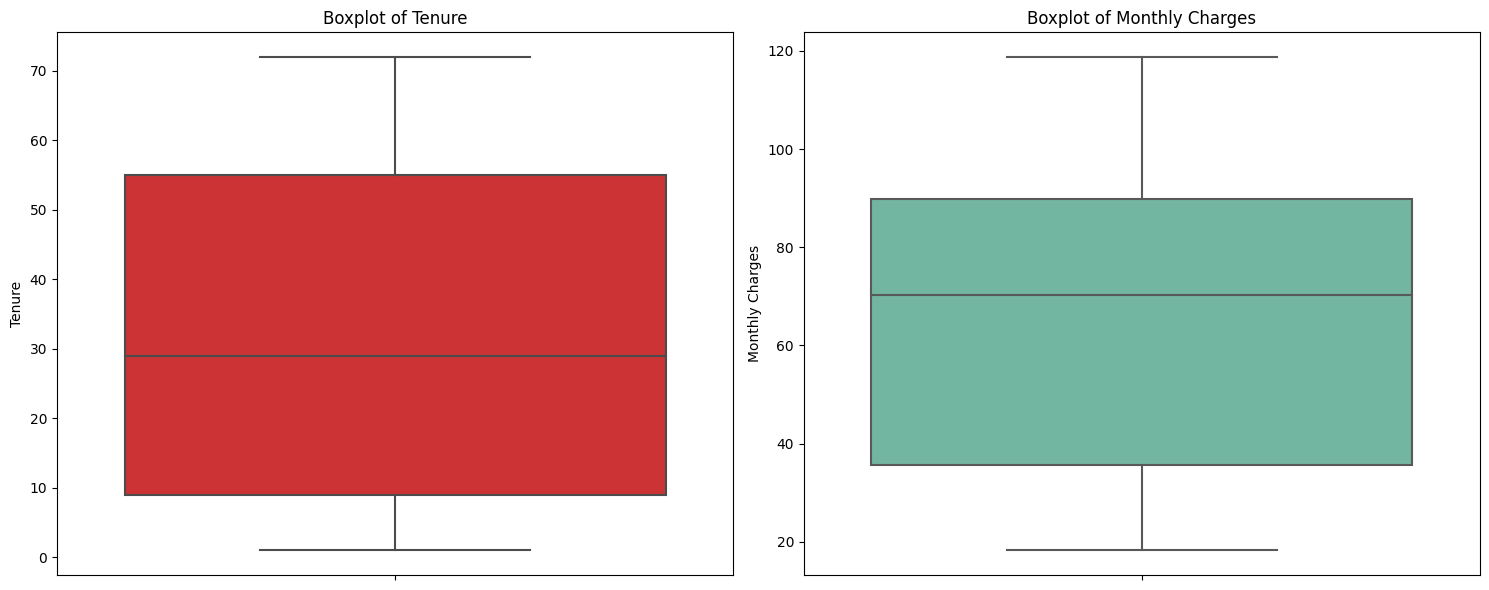

In [26]:
# Plot boxplots of tenure and MonthlyCharges without churn
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)        
sns.boxplot(y='tenure', data=df, palette='Set1')
plt.title('Boxplot of Tenure')
plt.ylabel('Tenure')
plt.subplot(1, 2, 2)            
sns.boxplot(y='MonthlyCharges', data=df, palette='Set2')
plt.title('Boxplot of Monthly Charges')
plt.ylabel('Monthly Charges')
plt.tight_layout()
plt.show()


## Section 3 : Encoding Variables for ML modelling

In this section, we will prepare the data for modelling. Here we will encode binary variables using 0 and 1 and one-hot-encoding (dummy variables) for categorical data, to prevent the assumption of categorical hierarchy by the ML models.

In [27]:
# FOr each column that is an object, check the unique values
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    print(f"{col}: {df[col].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [28]:
# Except for the customerID column, all object columns are categorical variables
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
# Encode other binary categorical variables
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].map({'No': 0, 'Yes': 1})

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [29]:
# Encode categorical variables with more than two categories        
df = pd.get_dummies(df, columns=['InternetService', 'MultipleLines', 'OnlineSecurity', 
                                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                   'StreamingTV', 'StreamingMovies', 'PaymentMethod', 'Contract'], drop_first=True)
# Check the first few rows of the updated DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,True,False,False,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,False,False,False,True,True,False
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,True,False,False
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,False,False,False,True,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,True,False,False,False


In [30]:
# Convert boolean columns to integers
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,0,0,0,0,0,1,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,0,0,0,0,0,0,0,1,1,0
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,0,0,0,0,1,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,1,0,0,0


In [31]:
# Check the shape of the DataFrame after encoding
df.shape

(7032, 32)

In [32]:
# Check the data types of the columns
df.dtypes

customerID                                object
gender                                     int64
SeniorCitizen                             object
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                int64
InternetService_No                         int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes

In [33]:
df.to_csv("../data/customer-churn-data-processed.csv", index=False)